In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
from IPython.display import HTML

In [29]:
rho = .75
maxa = 2
a = lambda t: (-2*maxa/25) * t * (t - 10) - maxa - 1.5
t = np.linspace(0,10, 100)
x = np.linspace(-4, 4)
y = lambda t: np.tanh(rho*x + a(t))
niceblue = np.array([0,76,138])/255.0


def f(t):
    return lambda x: -x + np.tanh(rho*x + a(t))

def odef(y, t):
    return -y + np.tanh(rho*y + a(t))

nodestate = odeint(odef, 0, t)

fp = [fsolve(f(ti), -.5) for ti in t]

In [50]:
plt.rcParams["figure.figsize"] = [10,7]

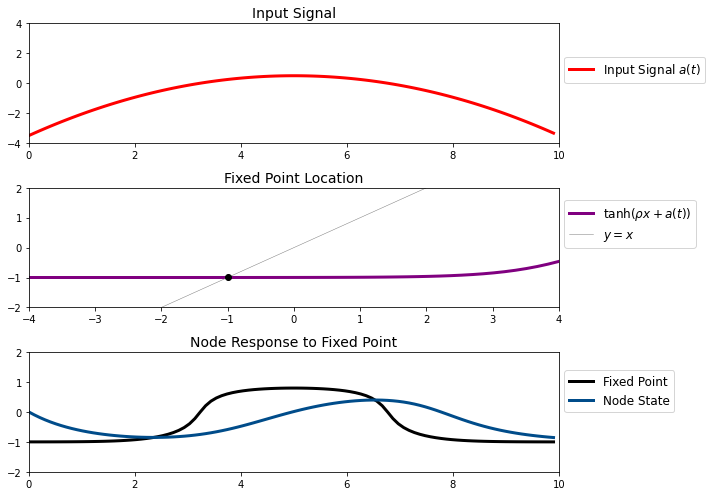

In [56]:
fig, (ax1, ax2, ax3)  = plt.subplots(nrows=3, ncols=1, squeeze=True)

# First subplot
ax1.set_title("Input Signal", fontsize=14)
ax1.axis([0, 10, -4, 4])
signal, = ax1.plot([], [], c="r", lw=3, label="Input Signal $a(t)$")
ax1.legend(loc=(1.01,.5), fontsize=12)

# Second subplot
ax2.set_title("Fixed Point Location", fontsize=14)
ax2.axis([-4, 4, -2, 2])
tanh, = ax2.plot([], [], c="purple", lw=3, label="$\\tanh(\\rho x + a(t))$")
yx, = ax2.plot([], [], c="gray", lw=0.5, label="$y = x$")
inter, = ax2.plot([], [], "o", c="k")
ax2.legend(loc=(1.01,.5), fontsize=12)


# Third Subplot
ax3.set_title("Node Response to Fixed Point", fontsize=14)
ax3.axis([0, 10, -2, 2])
fixed, = ax3.plot([],[], c="k", lw=3, label="Fixed Point")
node, = ax3.plot([], [], c=niceblue, lw=3, label="Node State")
ax3.legend(loc=(1.01,.5), fontsize=12)

# Spread out a little
plt.tight_layout()

def animate(i):
    signal.set_data(t[:i], a(t[:i]))
    tanh.set_data(x, y(t[i]))
    fixed.set_data(t[:i], fp[:i])
    yx.set_data(x, x)
    inter.set_data(fp[i], fp[i])
    node.set_data(t[:i], nodestate[:i])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval=100)

HTML(ani.to_jshtml())